# Heart disease

https://archive.ics.uci.edu/ml/datasets/heart+Disease

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
%matplotlib inline


# required for importin modules from other directories
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from common import misc
from common.data_parser import *
from config import *
from heart_helpers import *

plt.style.use("seaborn")

In [2]:
df = parse_heart_disease("big")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
num_samples, num_cols = df.shape
num_samples, num_cols

(303, 14)

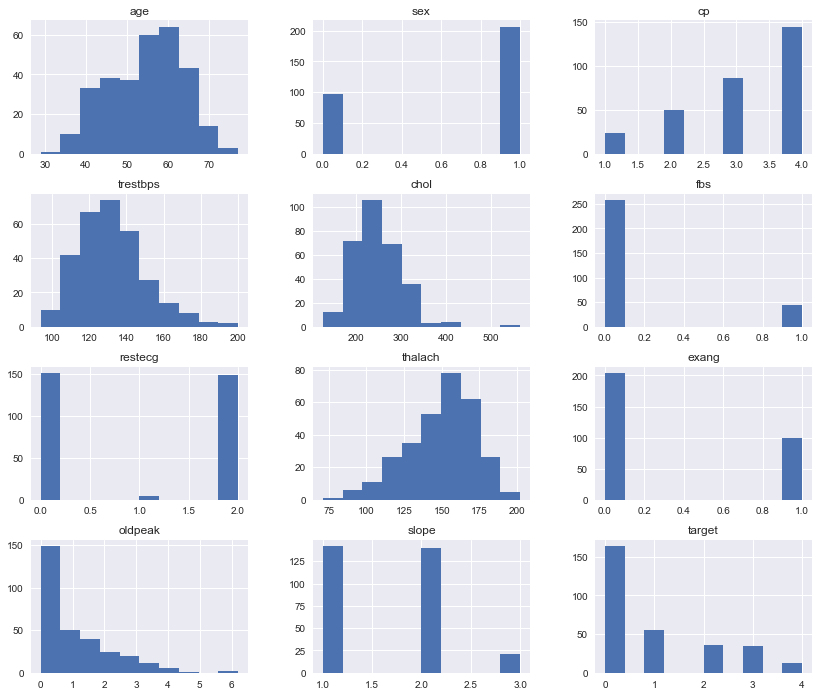

In [4]:
df.hist(figsize=(14,12));

In [5]:
import matplotlib as mpl

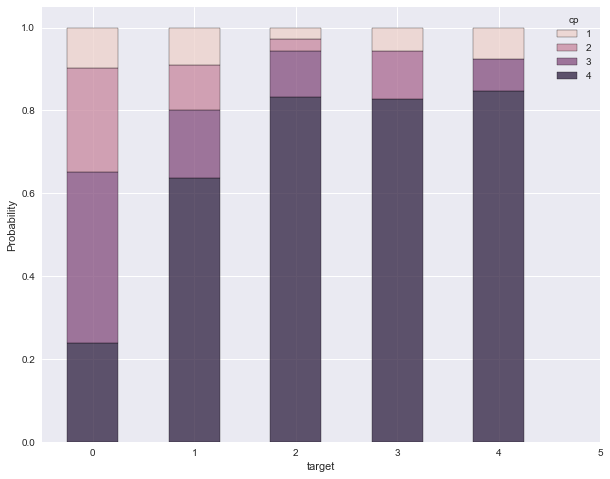

<Figure size 576x396 with 0 Axes>

In [6]:
#mpl.rcParams['legend.facecolor'] = 'white'
var = "probability"

fig, ax = plt.subplots(figsize=(10,8))
for i in [4,3,2,1,0]:
    sns.histplot(data=df[df["target"]==i], x="target", hue="cp", multiple="stack", stat=var, ax=ax, shrink=0.5);
ax.set_xlim(-0.5,5)
plt.show()
plt.clf()


In [7]:
cols = df.columns
feats = cols.drop("target")
feats

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

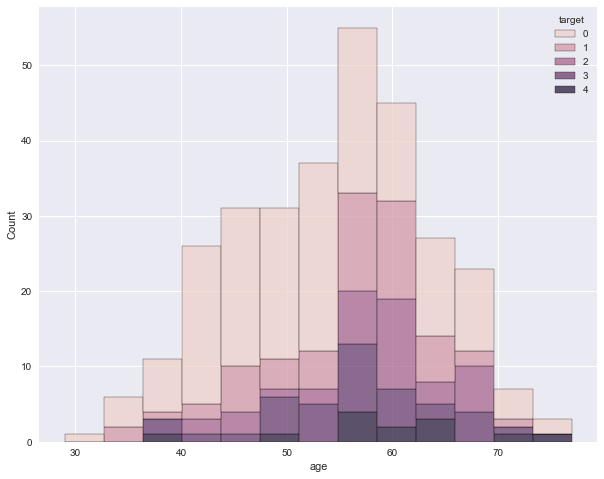

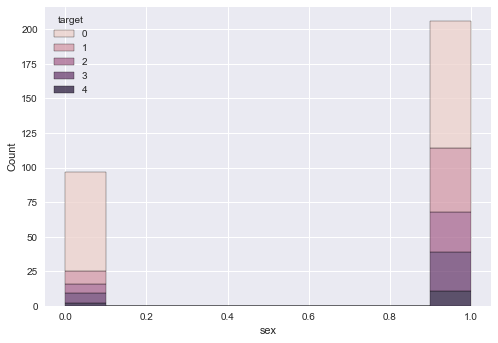

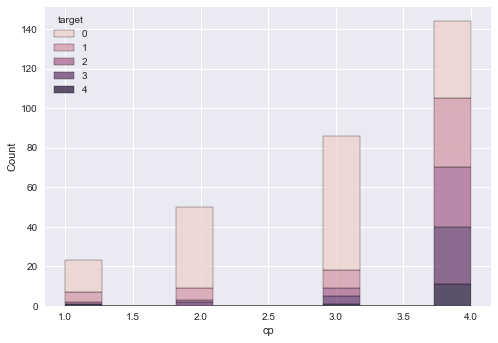

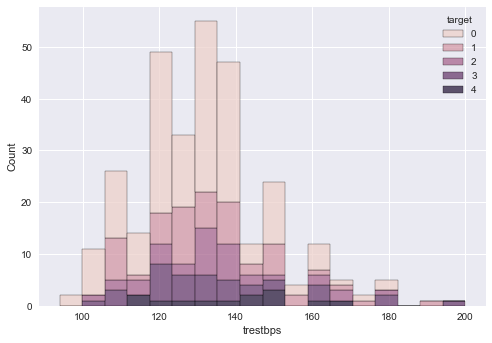

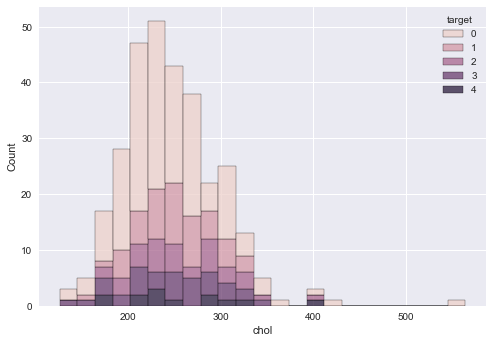

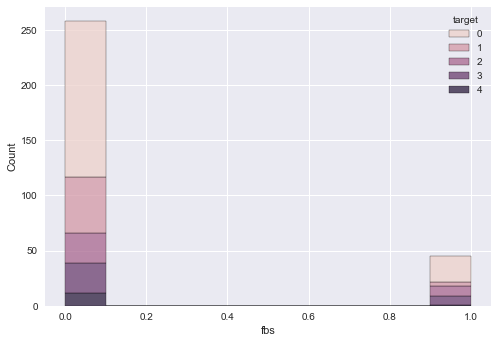

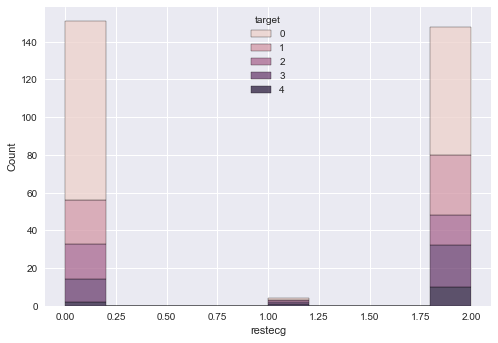

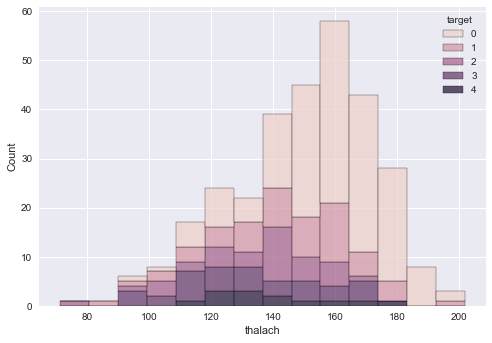

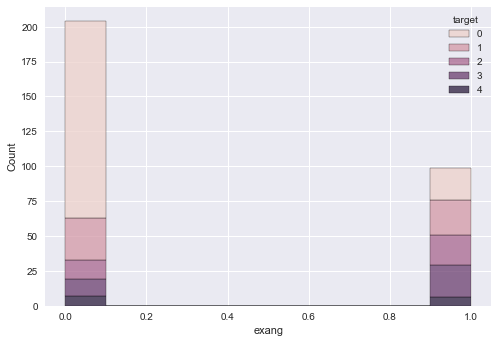

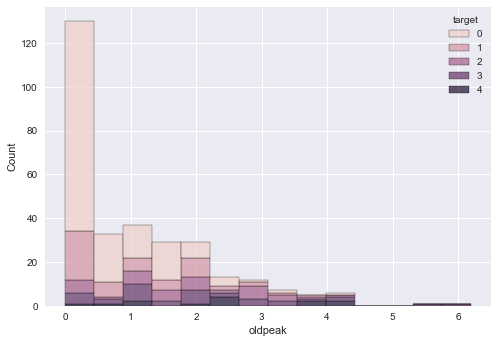

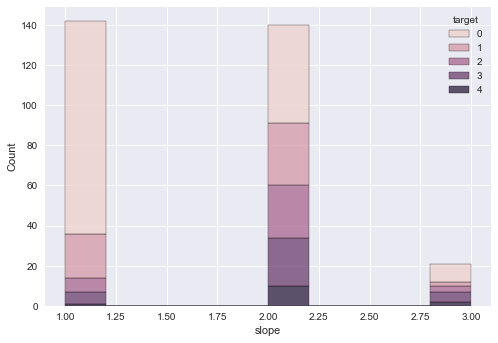

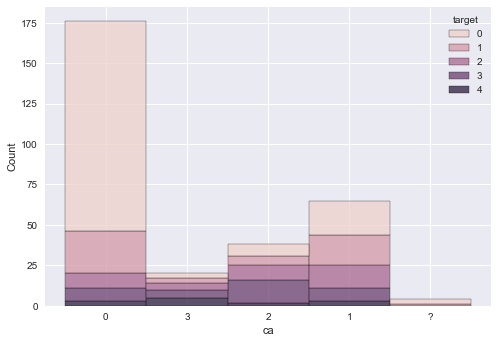

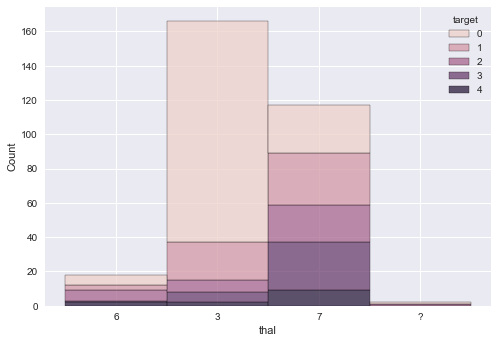

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
for feat in feats:
    sns.histplot(data=df, x=feat, hue="target", multiple="stack");
    plt.show()

In [9]:
df_nozero = df[df["target"]!=0]
df_nozero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       139 non-null    int64  
 1   sex       139 non-null    int64  
 2   cp        139 non-null    int64  
 3   trestbps  139 non-null    int64  
 4   chol      139 non-null    int64  
 5   fbs       139 non-null    int64  
 6   restecg   139 non-null    int64  
 7   thalach   139 non-null    int64  
 8   exang     139 non-null    int64  
 9   oldpeak   139 non-null    float64
 10  slope     139 non-null    int64  
 11  ca        139 non-null    object 
 12  thal      139 non-null    object 
 13  target    139 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 16.3+ KB


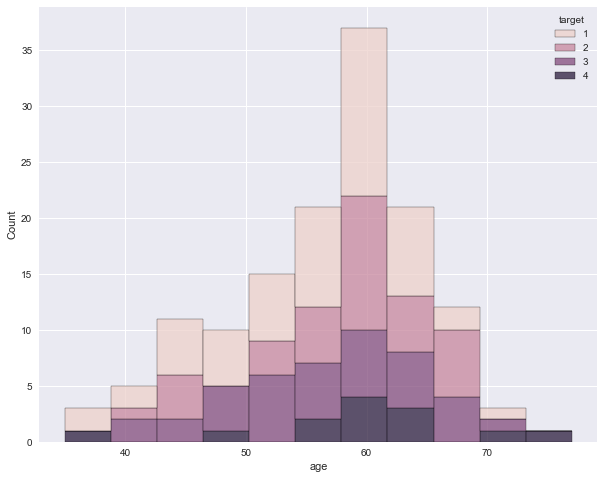

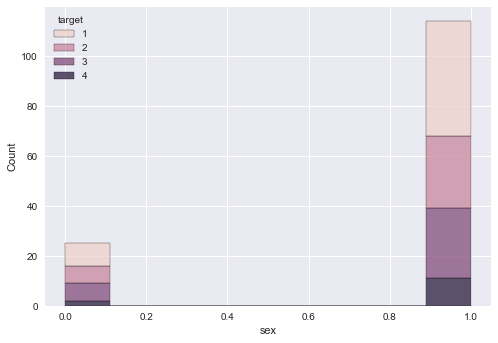

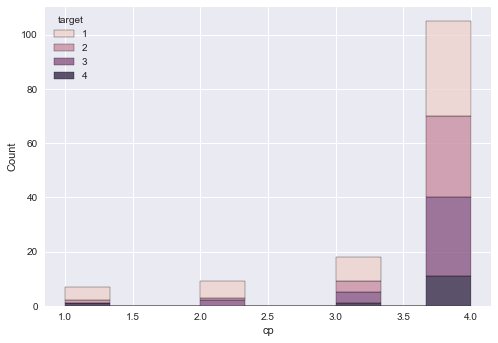

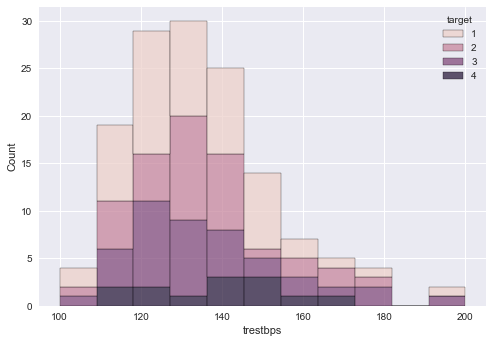

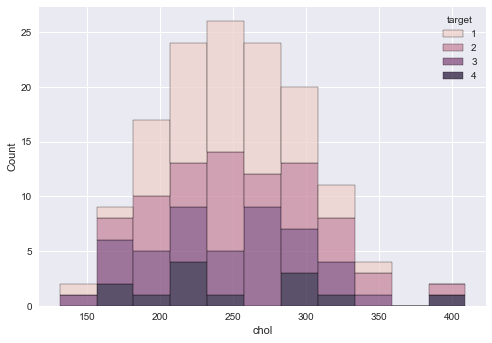

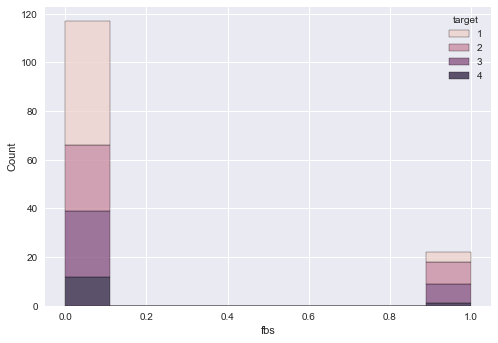

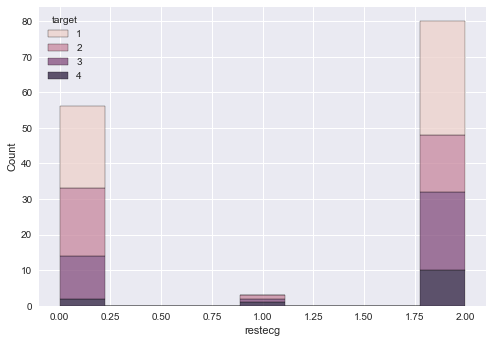

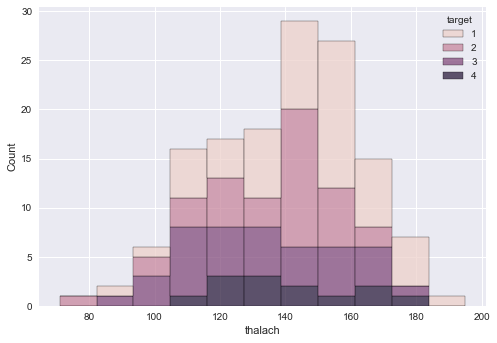

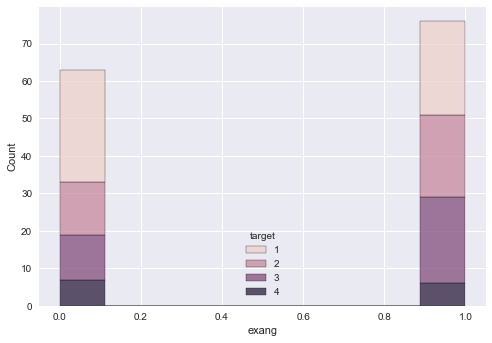

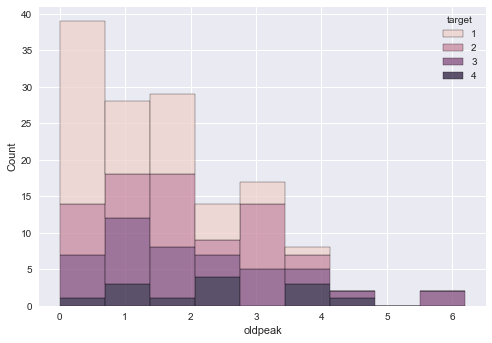

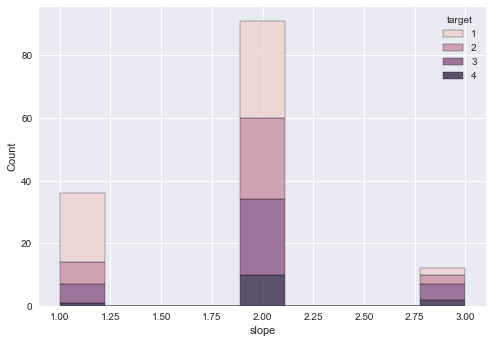

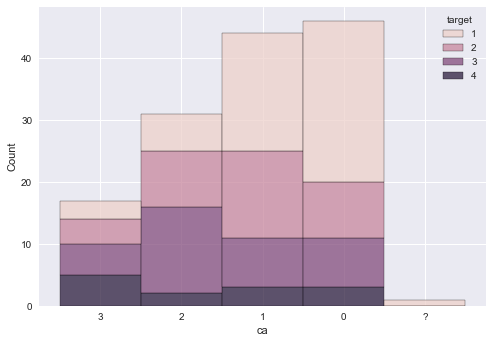

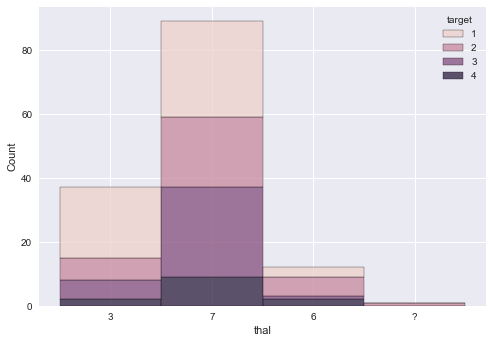

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
for feat in feats:
    sns.histplot(data=df_nozero, x=feat, hue="target", multiple="stack");
    plt.show()

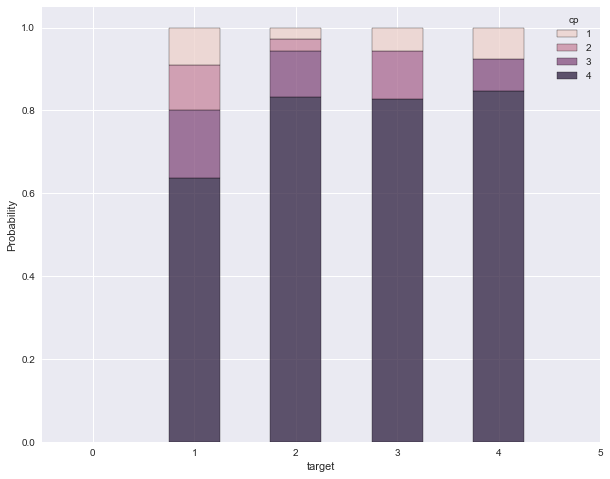

<Figure size 576x396 with 0 Axes>

In [11]:
#mpl.rcParams['legend.facecolor'] = 'white'
var = "probability"

fig, ax = plt.subplots(figsize=(10,8))
for i in [4,3,2,1,0]:
    sns.histplot(data=df_nozero[df_nozero["target"]==i], x="target", hue="cp", multiple="stack", stat=var, ax=ax, shrink=0.5);
ax.set_xlim(-0.5,5)
plt.show()
plt.clf()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


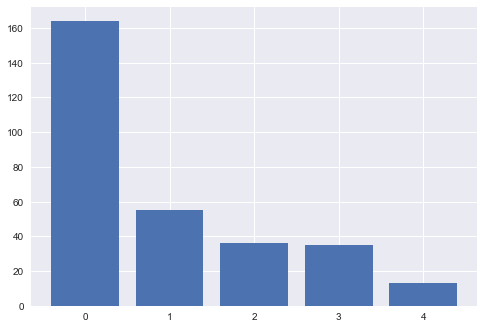

In [12]:
df["target"].hist(bins=[-0.4,0.4, 0.6, 1.4, 1.6, 2.4, 2.6, 3.4, 3.6, 4.4])
df.describe()

# Missing values

At this point, I noticed there actually were some missing values...there are a couple "?"s in the data, but only in 2 different columns

In [13]:
hc = heart_columns()
df_nans = df.replace(to_replace="?", value=np.nan)
df_nans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [14]:
count_values(df, ["ca"], mode=True,norm=False);
display(hc["ca"])
df[df["ca"] == "?"]

--- ca ---


0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

########################################


'number of major vessels (0-3) colored by flourosopy'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [15]:
count_values(df, ["thal"], mode=True,norm=False);
display(hc["thal"])
df[df["thal"] == "?"]

--- thal ---


3    166
7    117
6     18
?      2
Name: thal, dtype: int64

########################################


'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,2


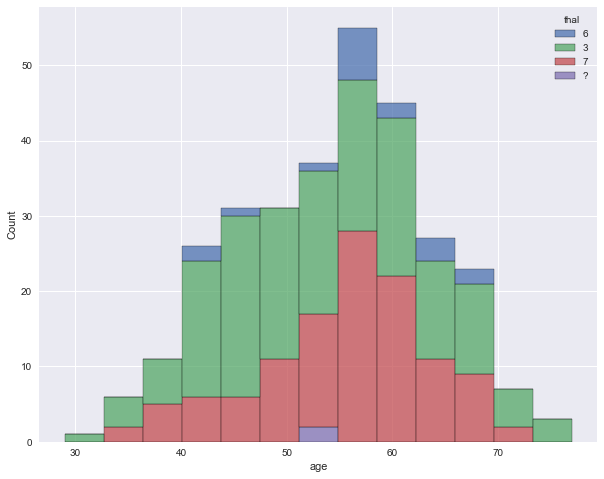

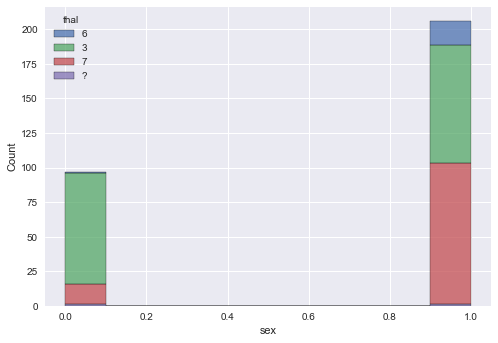

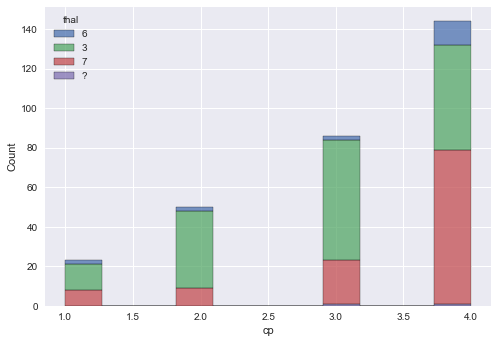

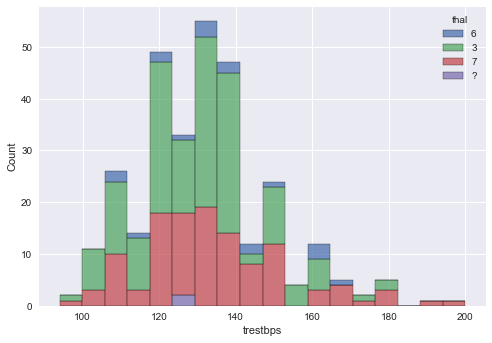

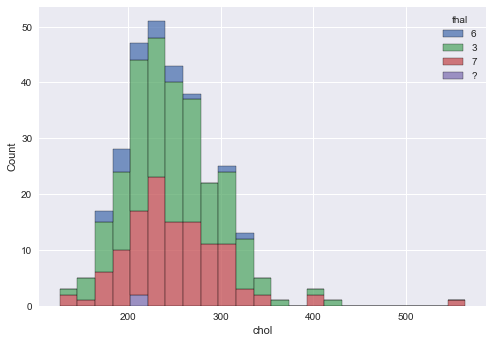

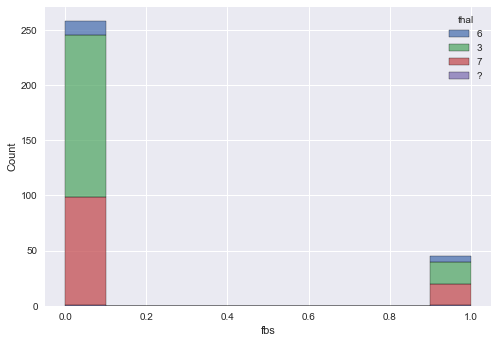

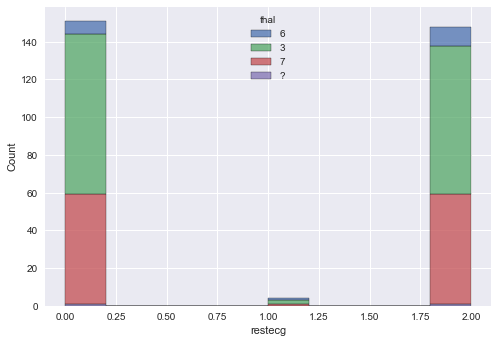

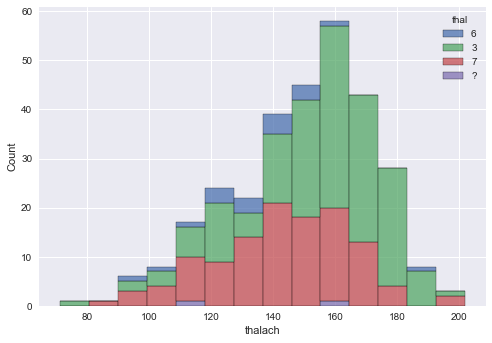

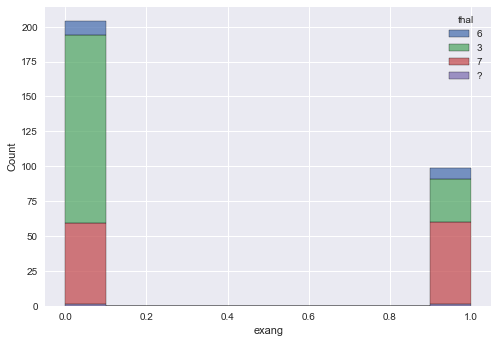

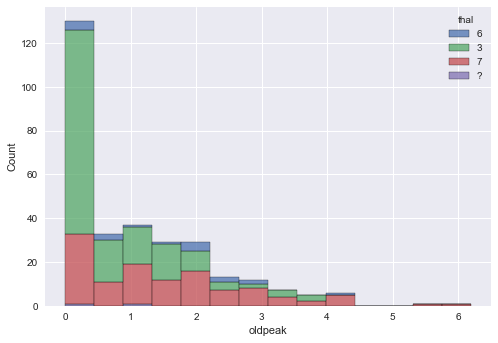

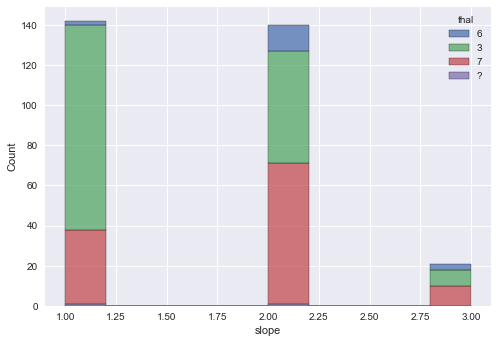

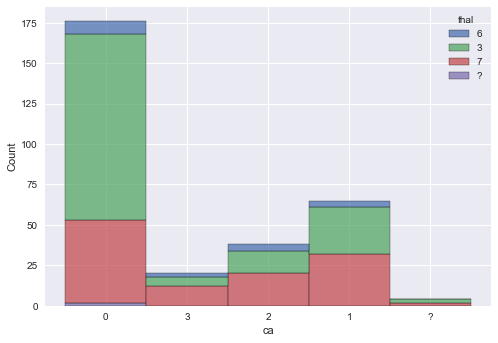

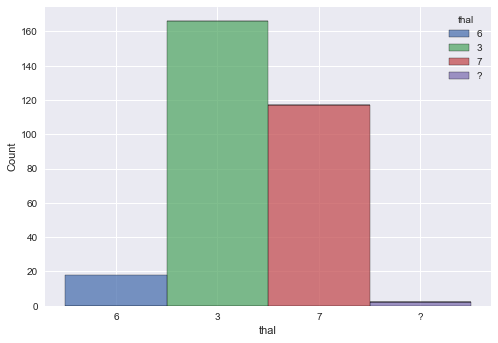

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
for feat in feats:
    sns.histplot(data=df, x=feat, hue="thal", multiple="stack");
    plt.show()

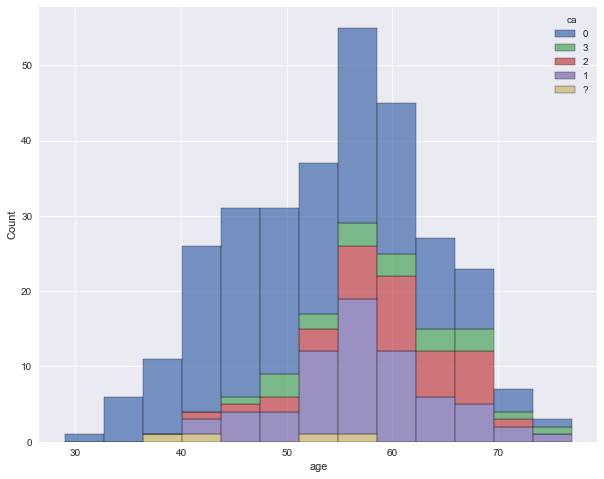

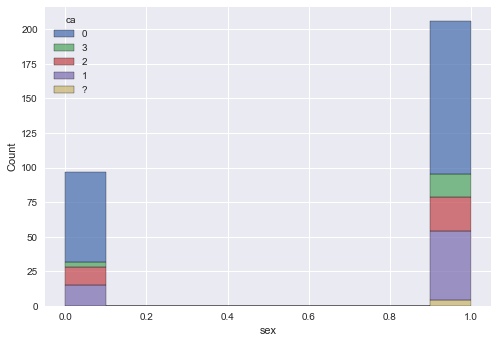

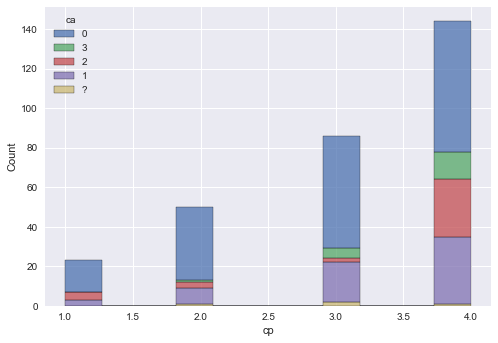

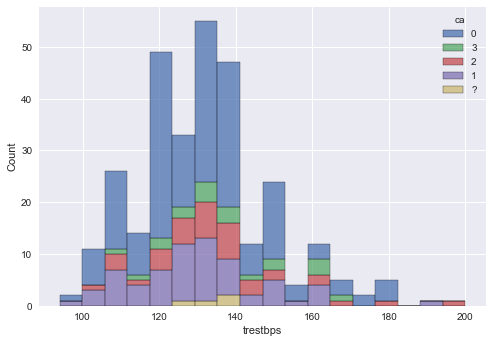

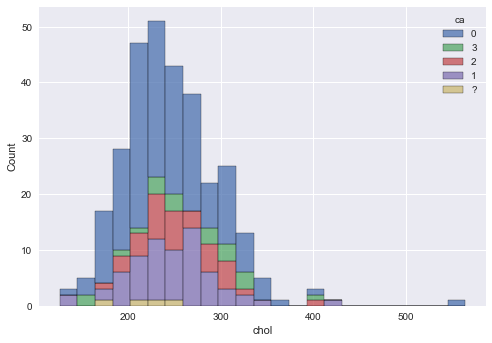

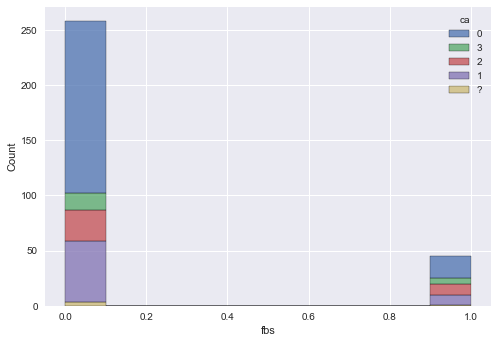

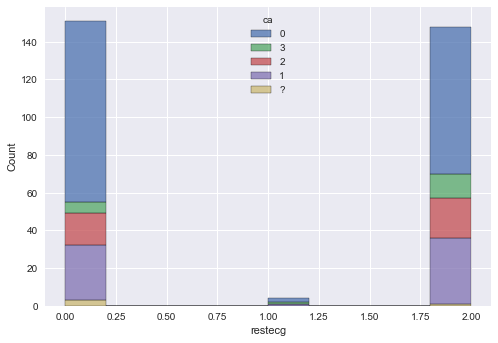

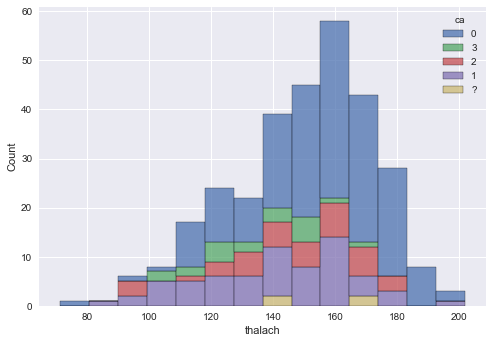

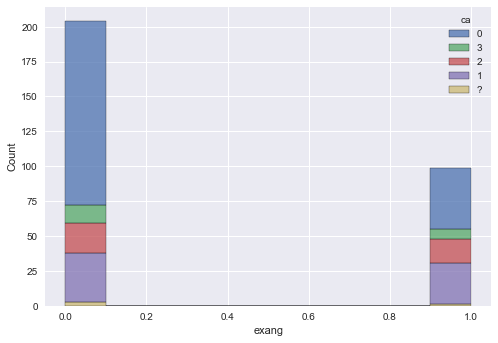

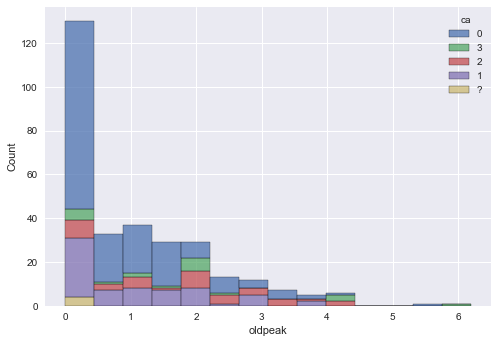

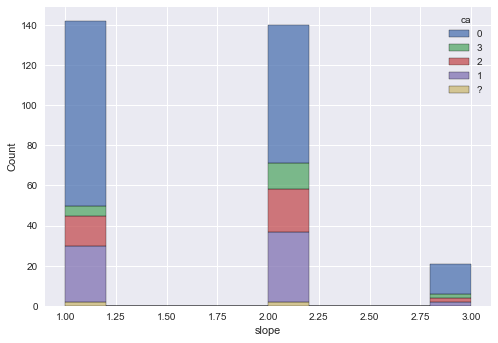

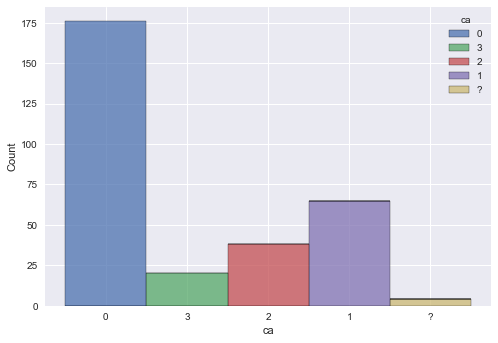

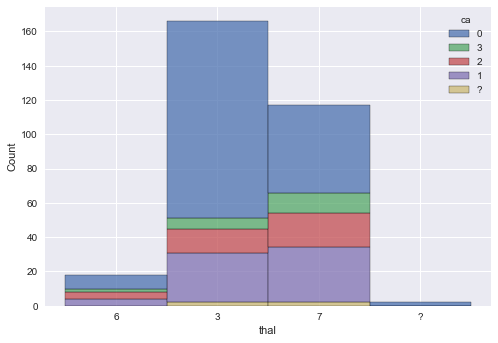

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
for feat in feats:
    sns.histplot(data=df, x=feat, hue="ca", multiple="stack");
    plt.show()

# Count different values in each column

In [18]:
dont_count = ["age", "trestbps", "chol", "thalach", "oldpeak"]
count_values(df, dont_count, norm=False);

--- sex ---


1    206
0     97
Name: sex, dtype: int64

########################################
--- cp ---


4    144
3     86
2     50
1     23
Name: cp, dtype: int64

########################################
--- fbs ---


0    258
1     45
Name: fbs, dtype: int64

########################################
--- restecg ---


0    151
2    148
1      4
Name: restecg, dtype: int64

########################################
--- exang ---


0    204
1     99
Name: exang, dtype: int64

########################################
--- slope ---


1    142
2    140
3     21
Name: slope, dtype: int64

########################################
--- ca ---


0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

########################################
--- thal ---


3    166
7    117
6     18
?      2
Name: thal, dtype: int64

########################################
--- target ---


0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

########################################


# Test

In [176]:
test2 = process_heart2(df, impute_mode=1);

display(test2[test2["thalMatch"]==False])
test2[test2["caMatch"]==False]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,caMatch,thalMatch
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,0.5,0.0,True,False
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,0.0,2.0,True,False


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,caMatch,thalMatch
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,1.0,0.0,0.0,False,True
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,0.0,1.0,1.0,False,True
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,1.0,1.0,0.0,False,True
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,0.0,0.0,False,True


In [177]:
test = process_heart2(df, impute_mode=2);
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,2,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,2,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,2,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,0,1


In [73]:
dont_count = ["age", "trestbps", "chol", "thalach", "oldpeak"]
count_values(test, dont_count);

--- sex ---


1    201
0     96
Name: sex, dtype: int64

########################################
--- cp ---


4    142
3     83
2     49
1     23
Name: cp, dtype: int64

########################################
--- fbs ---


0    254
1     43
Name: fbs, dtype: int64

########################################
--- restecg ---


0    147
2    146
1      4
Name: restecg, dtype: int64

########################################
--- exang ---


0    200
1     97
Name: exang, dtype: int64

########################################
--- slope ---


1    139
2    137
3     21
Name: slope, dtype: int64

########################################
--- ca ---


0    174
1     65
2     38
3     20
Name: ca, dtype: int64

########################################
--- thal ---


0    164
1    115
2     18
Name: thal, dtype: int64

########################################
--- target ---


0    160
1     54
3     35
2     35
4     13
Name: target, dtype: int64

########################################
